# [NTDS'19] assignment 1: network science
[ntds'19]: https://github.com/mdeff/ntds_2019

[Eda Bayram](https://lts4.epfl.ch/bayram), [EPFL LTS4](https://lts4.epfl.ch) and
[Nikolaos Karalias](https://people.epfl.ch/nikolaos.karalias), [EPFL LTS2](https://lts2.epfl.ch).

## Students

* Team: 13
* Students: 
    * Frédéric Henri Raymond Bischoff
    * Lucas Eckes
    * Lilia Ellouz
    * André Adel Alphone Ghattas

## Rules

Grading:
* The first deadline is for individual submissions. The second deadline is for the team submission.
* All team members will receive the same grade based on the team solution submitted on the second deadline.
* As a fallback, a team can ask for individual grading. In that case, solutions submitted on the first deadline are graded.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

Submission:
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter.

## Objective

The purpose of this milestone is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

## Section 1: Network Properties

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
pd.set_option('display.max_row',10)

### Question 1: Construct a Citation Graph and a Feature Graph

Read the `cora.content` file into a Pandas DataFrame by setting a header for the column names. Check the `README` file.

In [2]:
column_list = ['paper_id'] + [str(i) for i in range(0,1433)] +  ['class_label']
pd_content = pd.read_csv('data/cora/cora.content', delimiter='\t', names=column_list) 
pd_content

,paper_id,0,1,2,3,4,5,6,7,8,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,class_label
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


Print out the number of papers contained in each of the reasearch fields.

**Hint:** You can use the `value_counts()` function.

In [3]:
# Your code here.
pd_content['class_label'].value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: class_label, dtype: int64

Select all papers from a field of your choice and store their feature vectors into a NumPy array.
Check its shape.

In [4]:
my_field = "Neural_Networks"# Your code here.
features = pd_content[pd_content['class_label'] == my_field].drop(['paper_id','class_label'],axis=1).values# Your code here.
print(type(features))
features.shape

<class 'numpy.ndarray'>


(818, 1433)

Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array. 

In [5]:
distance = np.array([[ np.linalg.norm( (features[i,:]-features[j,:]))
                            for i in range(0,features.shape[0]) ]
                                 for j in range(0,features.shape[0])]).reshape(features.shape[0],-1)

distance

array([[0.        , 5.91607978, 4.12310563, ..., 5.91607978, 5.91607978,
        6.08276253],
       [5.91607978, 0.        , 4.89897949, ..., 5.83095189, 5.83095189,
        6.164414  ],
       [4.12310563, 4.89897949, 0.        , ..., 4.69041576, 4.47213595,
        4.89897949],
       ...,
       [5.91607978, 5.83095189, 4.69041576, ..., 0.        , 5.83095189,
        6.164414  ],
       [5.91607978, 5.83095189, 4.47213595, ..., 5.83095189, 0.        ,
        5.65685425],
       [6.08276253, 6.164414  , 4.89897949, ..., 6.164414  , 5.65685425,
        0.        ]])

Check the mean pairwise distance $\mathbb{E}[D]$.

In [6]:
mean_distance = distance.mean()
mean_distance

5.689638434824233

Plot an histogram of the euclidean distances.

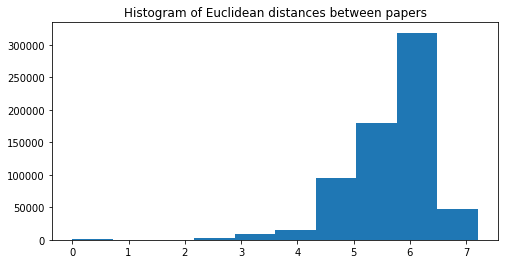

In [7]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between papers")
plt.hist(distance.flatten());

Now create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

First, let us choose the mean distance as the threshold.

In [8]:
threshold = mean_distance
A_feature = np.array([ [ 1 if ((distance[i,j]< mean_distance) and (i!=j)) else 0 for i in range(0,features.shape[0]) ]
     for j in range(0,features.shape[0])], np.float64).reshape(features.shape[0],-1)

Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix.

In [9]:
cora_cites = np.genfromtxt('data/cora/cora.cites', delimiter='\t')

#we isolate all unique paper ids and order them in a list
ID = pd_content["paper_id"].tolist()

#we create a dataframe with the list created before and fill it
df = pd.DataFrame(cora_cites, columns=['cited', 'citing'])
df['indice_cited']=df['cited'].map(lambda x: ID.index(x))
df['indice_citing']=df['citing'].map(lambda x: ID.index(x))

A_citation  = np.zeros((len(ID), len(ID)),np.float64)

for i, j in zip(df['indice_cited'],df['indice_citing']):
    A_citation [i, j] = 1
    A_citation [j, i] = 1

A_citation.shape

(2708, 2708)

Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [10]:
# Your code here.
#indices to keep corresponding to the choosen field
indices_to_keep  = pd_content[pd_content['class_label'] == my_field]['paper_id'].map(lambda x:ID.index(x))

row_idx = np.array(indices_to_keep)
col_idx = np.array(indices_to_keep)

A_citation = A_citation[row_idx[:, None], col_idx]
A_citation.shape

(818, 818)

Check if your adjacency matrix is symmetric. Symmetrize your final adjacency matrix if it's not already symmetric.

In [11]:
# Your code here.
np.count_nonzero(A_citation - A_citation.transpose())

0

Check the shape of your adjacency matrix again.

In [12]:
A_citation.shape

(818, 818)

### Question 2: Degree Distribution and Moments

What is the total number of edges in each graph?

In [13]:
num_edges_feature = np.count_nonzero(A_feature)/2 # Your code here.
num_edges_citation = np.count_nonzero(A_citation)/2# Your code here.
print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 136771.0
Number of edges in the citation graph: 1175.0


Plot the degree distribution histogram for each of the graphs.

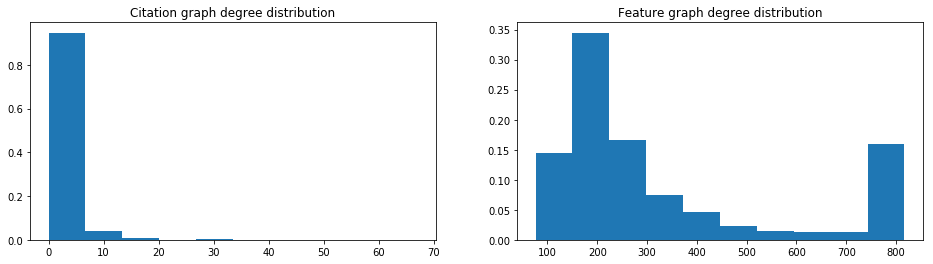

In [14]:
degrees_citation = np.sum(A_citation, axis=1)# Your code here.
degrees_feature =np.sum(A_feature, axis=1)# Your code here.

deg_hist_normalization = np.ones(degrees_citation.shape[0]) / degrees_citation.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(degrees_citation, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(degrees_feature, weights=deg_hist_normalization);

Calculate the first and second moments of the degree distribution of each graph.

In [15]:
cit_moment_1 = sum(degrees_citation)/len(degrees_citation)# Your code here.
cit_moment_2 = sum(degrees_citation**2)/len(degrees_citation)# Your code here.

feat_moment_1 = sum(degrees_feature)/len(degrees_feature)# Your code here.
feat_moment_2 = sum(degrees_feature**2)/len(degrees_feature)# Your code here.

print(f"1st moment of citation graph: {cit_moment_1}")
print(f"2nd moment of citation graph: {cit_moment_2}")
print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

#print('additional values:')
#print('variance citation graph:',np.sqrt(cit_moment_2 - cit_moment_1**2 ))
#print('variance feature graph:', np.sqrt(feat_moment_2 - feat_moment_1**2))

1st moment of citation graph: 2.8728606356968216
2nd moment of citation graph: 23.765281173594133
1st moment of feature graph: 334.4034229828851
2nd moment of feature graph: 167201.19804400977


What information do the moments provide you about the graphs?
Explain the differences in moments between graphs by comparing their degree distributions.

**Your answer here:**

The first moment gives the average number of links per node, which is approximately 119 times more important for the feature graph as for the citation graph. And the second moment for the feature graph is approximately 7200 times bigger than for the citation graph.

These huge differences in the moments of these two graphs are due to the difference in the degree distribution of the two graphs. Indeed, the max degree is around 30 for the citation graph and it goes up to 800 for the feature graph. For the citation graph, more than 90% of the degree are below 20 and for the feature graph 90% of the degree are above 700.

Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

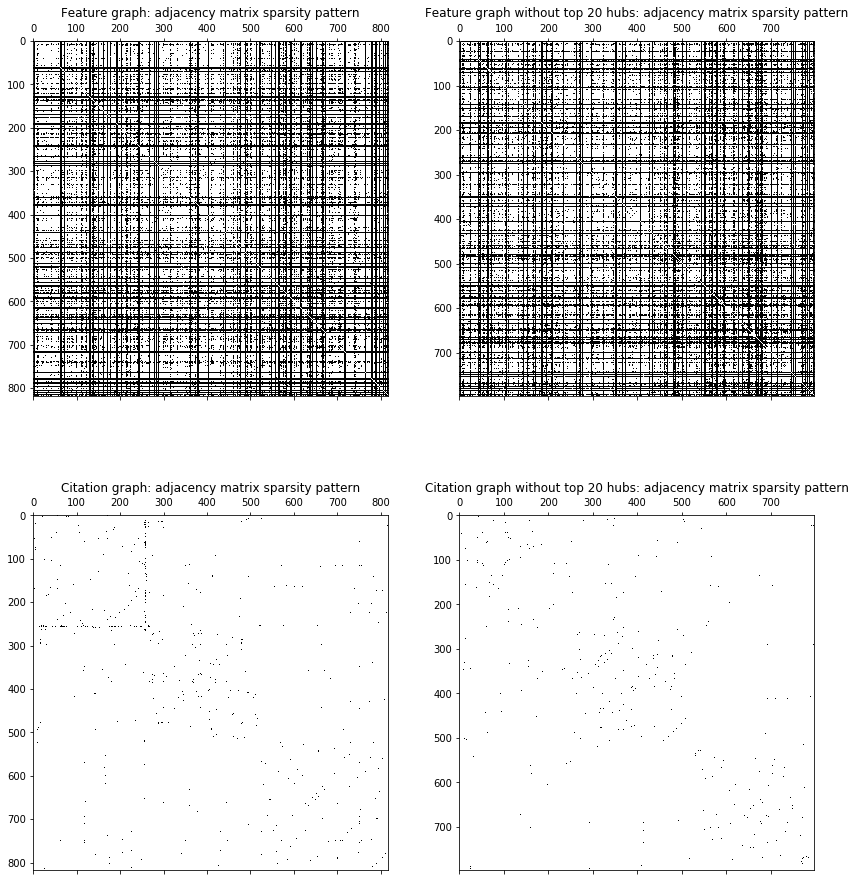

In [16]:
#sure to get the 20 biggest in the 20 last indices
ordered_indices_citation = np.argpartition(degrees_citation,-20)
#we don't keep lines corresponding to the 20 biggest nodes (the 20 last indices of last list)
reduced_A_citation = A_citation[np.sort(ordered_indices_citation[:-20,None],axis = 0), np.sort(ordered_indices_citation[:-20])]# Your code here

ordered_indices_feature = np.argpartition(degrees_feature,-20)
#we don't keep lines corresponding to the 20 biggest nodes (the 20 last indices of last list)
reduced_A_feature = A_feature[np.sort(ordered_indices_feature[:-20,None], axis = 0),np.sort(ordered_indices_feature[:-20])]# Your code here

                                        
fig, axes = plt.subplots(2, 2, figsize=(14, 16))
axes[0, 0].set_title('Feature graph: adjacency matrix sparsity pattern')
axes[0, 0].spy(A_feature);
axes[0, 1].set_title('Feature graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title('Citation graph: adjacency matrix sparsity pattern')
axes[1, 0].spy(A_citation);
axes[1, 1].set_title('Citation graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[1, 1].spy(reduced_A_citation);

Plot the new degree distribution histograms.

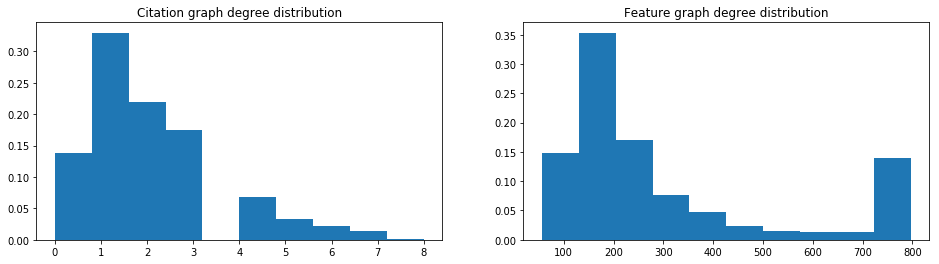

In [17]:
#reduced_degrees_cit = np.array([sum(reduced_A_citation[i,:]) for i in range(0,reduced_A_citation.shape[0])])# Your code here.
#reduced_degrees_feat = np.array([sum(reduced_A_feature[i,:]) for i in range(0,reduced_A_feature.shape[0])])# Your code here.

reduced_degrees_cit = np.sum(reduced_A_citation, axis=1)
reduced_degrees_feat = np.sum(reduced_A_feature, axis=1)

deg_hist_normalization = np.ones(reduced_degrees_feat.shape[0])/reduced_degrees_feat.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

Compute the first and second moments for the new graphs.

In [18]:
reduced_cit_moment_1 = sum(reduced_degrees_cit)/len(reduced_degrees_cit) # Your code here.
reduced_cit_moment_2 = sum(reduced_degrees_cit**2)/len(reduced_degrees_cit) # Your code here.

reduced_feat_moment_1 = sum(reduced_degrees_feat)/len(reduced_degrees_feat)# Your code here.
reduced_feat_moment_2 = sum(reduced_degrees_feat**2)/len(reduced_degrees_feat)# Your code here

print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 1.9724310776942355
Citation graph second moment: 6.2706766917293235
Feature graph first moment:  302.30827067669173
Feature graph second moment:  142170.32581453634


Print the number of edges in the reduced graphs.

In [19]:
# Your code here
num_edges_reduced_feature = np.count_nonzero(reduced_A_feature)/2 # Your code here.
num_edges_reduced_citation = np.count_nonzero(reduced_A_citation)/2# Your code here.
print(f"Number of edges in the reduced feature graph: {num_edges_reduced_feature}")
print(f"Number of edges in the reduced citation graph: {num_edges_reduced_citation}")

Number of edges in the reduced feature graph: 120621.0
Number of edges in the reduced citation graph: 787.0


Is the effect of removing the hubs the same for both networks? Look at the percentage changes for each moment. Which of the moments is affected the most and in which graph? Explain why.  

**Hint:** Examine the degree distributions.

**Your answer here:**

The decreases of number of edges for the first and second moment for the citation graph are respectively -29 % and -73%. And for the feature graph the decreases are  -10% and -14% for the first and second moment.

The effect is much bigger for the citation graph than for the feature graph. This is due to the fact that the part of big hubs in the distribution is much bigger for the feature graph as for the citation graph.

### Question 3: Pruning, sparsity, paths

By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [20]:
threshold = 0.498*mean_distance # Your code here.
A_feature_pruned = np.array([ [ 1 if ((distance[i,j]< threshold) and (i!=j)) else 0 for i in range(0,features.shape[0]) ]
     for j in range(0,features.shape[0])],np.float64).reshape(features.shape[0],-1)
num_edges_feature_pruned = np.count_nonzero(A_feature_pruned)/2# Your code here.

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 136771.0
Number of edges in the feature graph after pruning: 1386.0
Number of edges in the citation graph: 1175.0


The threshold has been computed in an experimental fashion. In fact, decreasing the given threshold gives a graph with 762 edges which is further from the number of edges desired than the one we get with this threshold.

Check your results by comparing the sparsity patterns and total number of edges between the graphs.

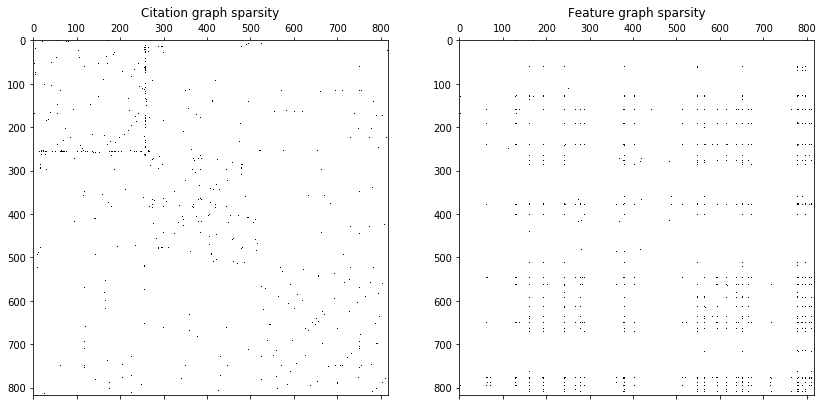

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 16))
axes[0].set_title('Citation graph sparsity')
axes[0].spy(A_citation);
axes[1].set_title('Feature graph sparsity')
axes[1].spy(A_feature_pruned);

We can see that the sparsity pattern is fairly similar despite one seeminly denser area towards the upper left side of the citation graph.
The number of nodes is fairly close as well. We have explained above why it is the best result we have gotten despite it being in the 100-edge range.

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

**Hint:** Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [22]:
#We sum all the k powers of the adjacency matrix
#the for-loop is for element-wise addition of the matrices (np.sum computes the sum of all elements in all of the matrices)
path_matrix_citation = np.zeros((A_citation.shape[0], A_citation.shape[0]))
path_matrix_feature = np.zeros((A_feature.shape[0], A_feature.shape[0]))

A_citation_tmp = np.identity(A_citation.shape[0])
A_feature_tmp = np.identity(A_feature.shape[0])

for i in range(10):
    path_matrix_citation += A_citation_tmp
    A_citation_tmp = A_citation_tmp @ A_citation
    path_matrix_feature += A_feature_tmp
    A_feature_tmp = A_feature_tmp @ A_feature
    


Check the sparsity pattern for both of path matrices.

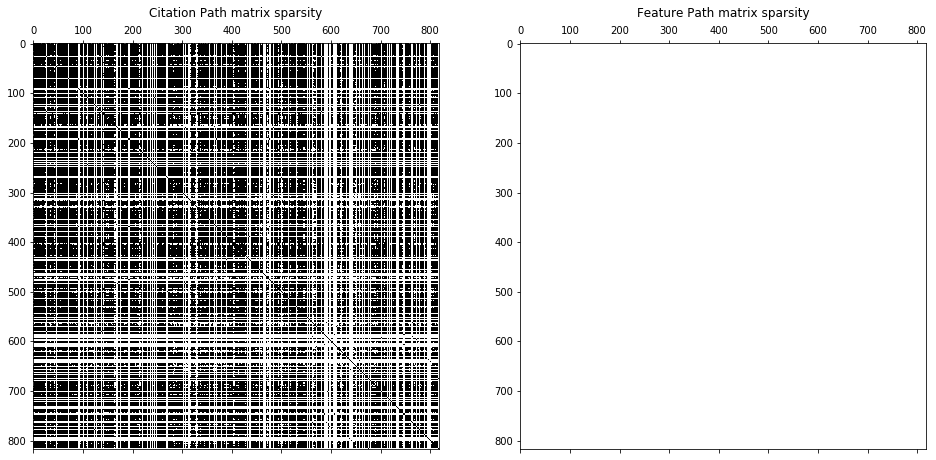

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Citation Path matrix sparsity')
axes[0].spy(path_matrix_citation);
axes[1].set_title('Feature Path matrix sparsity')
axes[1].spy(path_matrix_feature);

We can see that citation path matrix is fairly sparse which means that some nodes in the graph are 10 or more edges apart from each other. Hence, we cannot conclude whether it is fully connected or not.
The feature path matrix on the other hand is full of non-zeros values. Hence, all nodes are reachable from all other nodes in 10 or fewer jumps.

Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern. Is there any difference?

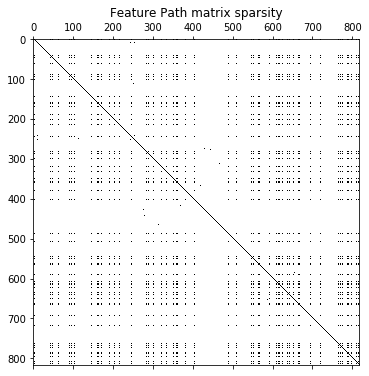

In [24]:
path_matrix_pruned = np.zeros((A_feature_pruned.shape[0], A_feature_pruned.shape[0]))
A_feature_tmp = np.identity(A_feature_pruned.shape[0])
for i in range(10):
    path_matrix_pruned += A_feature_tmp
    A_feature_tmp = A_feature_tmp @ A_feature_pruned
    
plt.figure(figsize=(12, 6))
plt.title('Feature Path matrix sparsity')
plt.spy(path_matrix_pruned);

**Your answer here:**

We can see that citation path matrix is fairly sparse which means that some nodes in the graph are 10 or more edges apart from each other. Hence, we cannot conclude whether it is fully connected or not.

The full feature path matrix on the other hand is full of ones. Hence, all nodes are reachable from all other nodes in 10 or fewer jumps. Hence, it is connected.

The pruned feature path matrix is quite different from the full one. It contains some zeros. We can clearly see that each edge is not reachable from itself in 10 or fewer steps. We can also see that some edges are not reachable from others in 10 or fewer steps. Hence, we cannot conclude if it is connected or not as the edges may as well be reachable from all other edges in numbers of steps which are superior to 10.

Describe how you can use the above process of counting paths to determine whether a graph is connected or not. Is the original (unpruned) feature graph connected?

**Your answer here:** 

If there are no zeros in the path graph which has been computed for N, we can be sure that each edge is reachable from all other nodes in N or fewer steps. Hence, this would lead us to conclude that the graph is connected. On the other hand, if there are still zeros in the path graph calculated, we cannot conclude that the graph is connected as some nodes are not reachable from other nodes in N steps or fewer. We cannot conclude that the graph is not connected either as the nodes might be reachable in a number of steps that is superior to N.

The original unpruned feature graph matrix does not contain any zeros. Hence, it is connected.

In [25]:
print('Number of zeros in the the matrix path feature for N =10: ',
      sum(path_matrix_feature[path_matrix_feature==0]))

Number of zeros in the the matrix path feature for N =10:  0


If the graph is connected, how can you guess its diameter using the path matrix?

**Your answer here:**

We have to find the smallest number of steps N such that there are no more zeros in path matrix. This would mean that all nodes are reachable from all other nodes in N steps or fewer. Hence, we would iterate over all N until we find such a path matrix. This could potentially give us an infinite loop. Hence, a maximum number of steps would have to be established or a mechanism detecting the convergence of the matrix would have to be implemented.

If any of your graphs is connected, calculate the diameter using that process.

In [26]:
i=0
#path_matrix_feature = A_feature.copy()
path_matrix_feature = np.identity(A_feature.shape[0])
A_feature_tmp = np.identity(A_feature.shape[0])
#nb_zeros = sum(path_matrix_feature[path_matrix_feature!=0])

while 0 in path_matrix_feature:
    A_feature_tmp = A_feature_tmp @ A_feature
    path_matrix_feature += A_feature_tmp
    #path_matrix_feature += np.linalg.matrix_power(A_feature,i)# Your code here.
    i = i + 1
    
diameter = i
print(f"The diameter is: {diameter}")

The diameter is: 2


Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).
Note: usage of NetworkX is only allowed in this part of Section 1.

In [27]:
import networkx as nx
feature_graph = nx.from_numpy_matrix(A_feature)
print(f"Diameter according to networkx: {nx.diameter(feature_graph)}")

Diameter according to networkx: 2


## Section 2: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below.

In [28]:
import networkx as nx

Let us create NetworkX graph objects from the adjacency matrices computed in the previous section.

In [29]:
G_citation = nx.from_numpy_matrix(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_citation.number_of_selfloops(), nx.number_connected_components(G_citation)))

Number of nodes: 818, Number of edges: 1175
Number of self-loops: 0, Number of connected components: 104


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [30]:
G_feature = nx.from_numpy_matrix(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_feature.number_of_selfloops(), nx.number_connected_components(G_feature)))

Number of nodes: 818, Number of edges: 1386
Number of self-loops: 0, Number of connected components: 684


### Question 4: Simulation with Erdős–Rényi and Barabási–Albert models

Create an Erdős–Rényi and a Barabási–Albert graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [31]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

818

The number of match shall fit the average of the number of edges in the citation and the feature graph.

In [32]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

1280.0

How do you determine the probability parameter for the Erdős–Rényi graph?

**Your answer here:**

- We can use the formula for the expected number of links: $E[number\_edges] =  {N \choose 2}p  =  p \dfrac{N(N-1)}{2}$ with $p$ the probability parameter for the Erdös-Rényi graph, and $N$ is the number of nodes. We solve this equation for $p$ and replace the expected number of links with $m$, the match number. We get $p = \dfrac{2E[number\_edges]} {n(n-1)} = \dfrac{2 m} {n(n-1)} $

In [33]:
p = (m*2)/(n*(n-1))
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [34]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 1268 edges.


How do you determine the preferential attachment parameter for Barabási–Albert graphs?

**Your answer here:**

* We can use the formula $ L = q  n $ with $N$ the number of nodes, $L$ the number of links, and $q$ the preferential attachment parameter. For $L$, we will use the match number $m$. So $q = m/N $. 

In [35]:
q = int(np.round(m/n))
G_ba = nx.barabasi_albert_graph(n, q)

Check the number of edges in the Barabási–Albert graph.

In [36]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 1632 edges.


### Question 5: Giant Component

Check the size of the largest connected component in the citation and feature graphs.

In [37]:
giant_citation = max(nx.connected_component_subgraphs(G_citation), key=len)
print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))

The giant component of the citation graph has 636 nodes and 1079 edges.


In [38]:
giant_feature = max(nx.connected_component_subgraphs(G_feature), key=len)
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

The giant component of the feature graph has 117 nodes and 1364 edges.


Check the size of the giant components in the generated Erdős–Rényi graph.

In [39]:
giant_er = max(nx.connected_component_subgraphs(G_er), key=len)
print('The giant component of the Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))

The giant component of the Erdos-Rényi network has 781 nodes and 1267 edges.


Let us match the number of nodes in the giant component of the feature graph by simulating a new Erdős–Rényi network.
How do you choose the probability parameter this time? 

**Hint:** Recall the expected giant component size from the lectures.

**Your answer here:**

From the lectures we know that for random networks, the ratio of the number of nodes in the giant component and that of the nodes in the network $S = \frac{N_{g}}{N}$ follws this equation: $S = 1 - e^{-<k>S}$ such that $<k>$ is the average degree of nodes. We also know that $<k>$ follows the equation: $p = \frac{<k>}{N - 1}$ such that $p$ is the preferential attachement probability and $N$ is the number of nodes. Taking $<k> = p(N - 1)$ from the second equation and plugging it in the first equation gives us: $S = 1 - e^{-p(N -1)S}$.

Solving this equation for $p$ gives us: $p = \frac{ln(1 - S)}{S(1-N)}$. We have thus found the preferential probability for a random Erdős–Rényi network such that we get a giant component with the same number of nodes as the feature graph. We set $S = \frac{N_{g}}{N}$ such that ${N_{g}}$ is the number of nodes in the giant component of the feature network and {N} is the total number of nodes.

In [40]:
#epsilon = 0.1
#p_new = (1 + epsilon) / n # Your code here.
n_g=giant_feature.number_of_nodes()
s=n_g/n
p_new=(np.log(1-s))/(s*(1-n))
G_er_new = nx.erdos_renyi_graph(n, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [41]:
print('My new Erdos Renyi network that simulates the citation graph has {} edges.'.format(G_er_new.size()))
giant_er_new = max(nx.connected_component_subgraphs(G_er_new), key=len)
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the citation graph has 450 edges.
The giant component of the new Erdos-Rényi network has 85 nodes and 85 edges.


### Question 6: Degree Distributions

Recall the degree distribution of the citation and the feature graph.

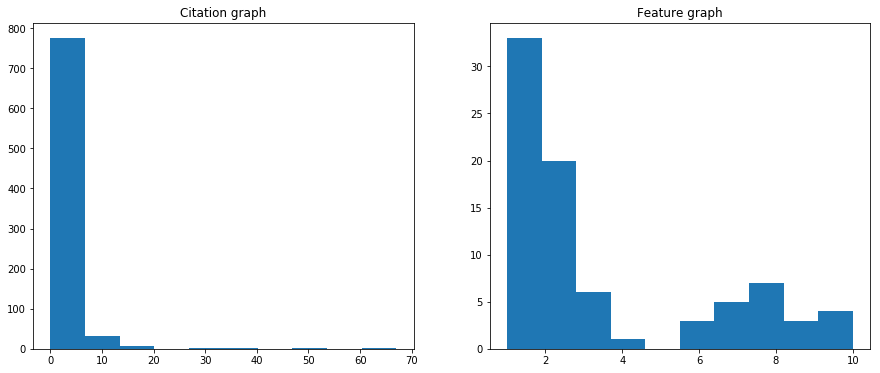

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
citation_degrees = np.sum(A_citation, axis=1)
axes[0].hist(citation_degrees);
axes[1].set_title('Feature graph')
feature_degrees = np.sum(A_feature_pruned, axis=1)
axes[1].hist(feature_degrees,range=(1,10));

* Below, we plot the histogram the degree distributions with more bins (=50) for better visualization
* We also visualize the degree distributions on a log-log-scale

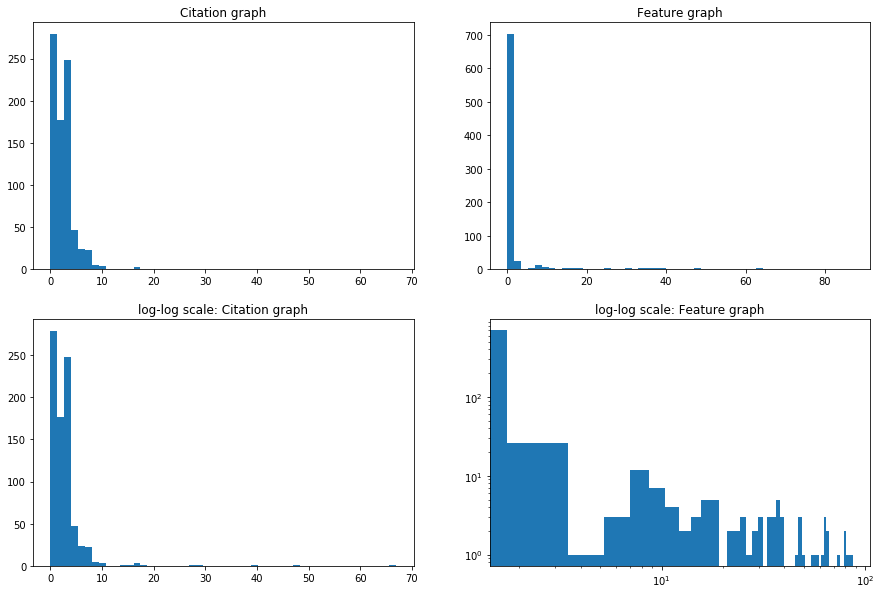

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0][0].set_title('Citation graph')
citation_degrees = np.sum(A_citation, axis=1)
axes[0][0].hist(citation_degrees,bins=50);
axes[0][1].set_title('Feature graph')
feature_degrees = np.sum(A_feature_pruned, axis=1)
axes[0][1].hist(feature_degrees,bins=50);
plt.yscale('log')
plt.xscale('log')
axes[1][0].set_title('log-log scale: Citation graph')
citation_degrees = np.sum(A_citation, axis=1)
axes[1][0].hist(citation_degrees,bins=50);
axes[1][1].set_title('log-log scale: Feature graph')
feature_degrees = np.sum(A_feature_pruned, axis=1)
axes[1][1].hist(feature_degrees,bins=50);

What does the degree distribution tell us about a network? Can you make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions?

**Your answer here:**

* The **degree distribution** tells us the number of nodes that have n edges for n going from 0 to infinity. Hence, it gives an insights on the preferential attachement of the network, on the average degree of the nodes of the network and on how dispersed the number of edges that a given node has. It might also help us guess the network model type that most resembles the given network, and infer if the network is fully connected (in the case where each node has a lot of edges) or comprised of small connected components.


* The **degree distribution for the citation graph** seems to follow a **Power Law**. Hence, we may predict that the citation graph is a **scale-free network**.


* The **degree distribution for the feature graph** seems to follow an **exponential distribution**. Hence, we may predict that the feature graph is a **random network**.

Now, plot the degree distribution historgrams for the simulated networks.

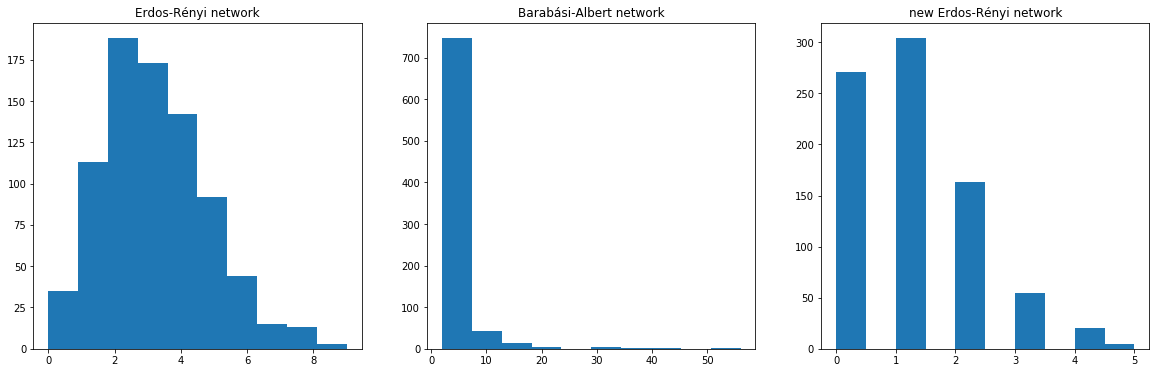

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].set_title('Erdos-Rényi network')
er_degrees = [d for (i,d) in G_er.degree()]
axes[0].hist(er_degrees);
axes[1].set_title('Barabási-Albert network')
ba_degrees = [d for (i,d) in G_ba.degree()]
axes[1].hist(ba_degrees);
axes[2].set_title('new Erdos-Rényi network')
er_new_degrees = [d for (i,d) in G_er_new.degree()]
axes[2].hist(er_new_degrees);

In terms of the degree distribution, is there a good match between the citation and feature graphs and the simulated networks?
For the citation graph, choose one of the simulated networks above that match its degree distribution best. Indicate your preference below.

**Your answer here:** 

* The distribution for the **Erdos-Rényi** graph somewhat resembles that of the citation graph, for smaller values especially. However, the distribution of the citation graph is long-tailed, unlike the distribution for the Erdos-Rényi graph which just has values for degrees up to 10.


* The citation graph seems to have a distribution which is very close to that of the **Barabási-Albert network**. They are both skewed and long-tailed. The feature graph distribution seems to have the same characteristics as it is also longtailed. Hence, the feature graph might correspond to a Barbási-Albert network as well.


* The distribution of the feature graph somewhat resembles that of the **new Erdos-Rényi** graph, at least towards the smaller values. We can however see that there is a clear difference for bigger values as the feature graph has nodes with bigger degrees whereas in the Erdos-Rényi graph distribution we can see that there are no nodes with bigger degree values. The makes sense. In fact, the formula we used to generate the new Erdos-Rényi graph was dependent of the number of nodes and did not depend at all on the number of edges.

You can also simulate a network using the configuration model to match its degree disctribution exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).

Let us create another network to match the degree distribution of the feature graph. 

In [45]:
G_config = nx.configuration_model(np.array([int(i) for i in feature_degrees]))
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))

Configuration model has 818 nodes and 1386 edges.


Does it mean that we create the same graph with the feature graph by the configuration model? If not, how do you understand that they are not the same?

**Your answer here:**

Despite having a very similar degree distribution as we can see in the plot below, the graphs do not have the same adjacency matrix as we can also see below. Hence, the nodes are not connected in the same way. We can conclude that we did not create the same graph as the feature graph by the configuration model.

In [46]:
diff = np.count_nonzero(nx.adjacency_matrix(G_config) - A_feature_pruned)
print('Number of differences in ways nodes are connected: ' + str(diff) + '.')

Number of differences in ways nodes are connected: 2856.


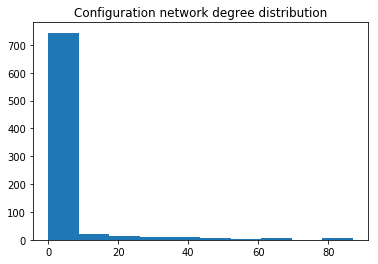

In [47]:
config_degrees = [d for (i,d) in G_config.degree()]
plt.hist(config_degrees);
plt.title('Configuration network degree distribution');

### Question 7: Clustering Coefficient

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [48]:
nx.average_clustering(G_citation)

0.21693567980632222

In [49]:
nx.average_clustering(G_feature)

0.1220744470334593

What does the clustering coefficient tell us about a network? Comment on the values you obtain for the citation and feature graph.

**Your answer here:**

* The **average clustering coefficient** (which we compute here) is an average over all the nodes of the local clustering coefficient. This value indicates how connected the nodes in the graph are.
* The **local clustering** coefficient for a given node gives us an idea about how connected its neighbouring nodes are.  

*We note that we did not compute the global clustering coefficient (which is transitivity in NetworkX)*

Now, let us check the average clustering coefficient for the simulated networks.

In [50]:
nx.average_clustering(G_er)

0.005104397097062133

In [51]:
nx.average_clustering(G_ba)

0.02474512858204146

In [52]:
nx.average_clustering(nx.Graph(G_config))

0.058488791475318505

Comment on the values you obtain for the simulated networks. Is there any good match to the citation or feature graph in terms of clustering coefficient?

**Your answer here:**

There  is no good match for the simulated networks. The average clustering coefficient for the configuration model is the closest to the coefficient of the real network. But there is still a very big difference between the two numbers. 

Check the other [network model generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html) provided by NetworkX. Which one do you predict to have a better match to the citation graph or the feature graph in terms of degree distribution and clustering coefficient at the same time? Justify your answer.

**Your answer here:**

* We should probably use one from the Random Graphs generators, since we need either a power law degree distribution, or an exponential degree distribution.

If you find a better fit, create a graph object below for that network model. Print the number of edges and the average clustering coefficient. Plot the histogram of the degree distribution.

Citation graph:
	Model has 818 nodes and 1632 edges.
	Model has an average clustering coefficient of 0.21040386923268795.

Feature graph:
	Model has 818 nodes and 1632 edges.
	Model has an average clustering coefficient of 0.10772484205354638.



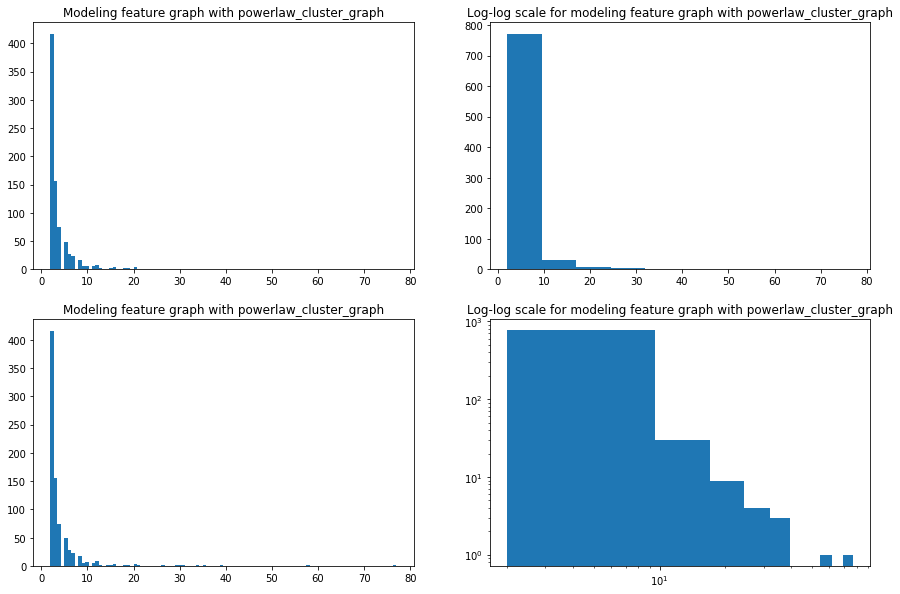

In [53]:
#Use powerlaw_cluster_graph to model the citation graph
G_citation_fit = nx.powerlaw_cluster_graph(n, 2, 0.25)
print('Citation graph:')
print('\tModel has {} nodes and {} edges.'.format(G_citation_fit.number_of_nodes(), G_citation_fit.size()))
print('\tModel has an average clustering coefficient of {}.\n'.format(nx.average_clustering(G_citation_fit)))

#Use powerlaw_cluster_graph to model the feature graph
G_feature_fit = nx.powerlaw_cluster_graph(n, 2, 0.13)
print('Feature graph:')
print('\tModel has {} nodes and {} edges.'.format(G_feature_fit.number_of_nodes(), G_feature_fit.size()))
print('\tModel has an average clustering coefficient of {}.\n'.format(nx.average_clustering(G_feature_fit)))

# display the degree distribution: citation graph
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0][0].set_title('Modeling feature graph with powerlaw_cluster_graph')
citation_fit_degrees = [G_feature_fit.degree(n) for n in G_feature_fit.nodes()]
axes[0][0].hist(citation_fit_degrees, bins=100);
axes[0][1].set_title('Log-log scale for modeling feature graph with powerlaw_cluster_graph')
plt.yscale('log')
plt.xscale('log')
axes[0][1].hist(citation_fit_degrees);

# display the degree distribution: feature graph
axes[1][0].set_title('Modeling feature graph with powerlaw_cluster_graph')
feature_fit_degrees = [G_feature_fit.degree(n) for n in G_feature_fit.nodes()]
axes[1][0].hist(feature_fit_degrees, bins=100);
axes[1][1].set_title('Log-log scale for modeling feature graph with powerlaw_cluster_graph')
plt.yscale('log')
plt.xscale('log')
axes[1][1].hist(feature_fit_degrees);


Comment on the similarities of your match.

**Your answer here:**

The powerlaw_cluster_graph model generator was used to model both graphs. For both graphs, the first parameter (which is the number of random edges to add for each new node) was set to 2. 
    
* This seems to model the **citation graph** well, since we found that the degree distribution follows a power law. We set the probability of adding a triangle after adding a random edge to 0.25 to match the average clustering coefficient of the original graph.

* For the **feature graph**, there wasn't really a model generator that could generate a graph with an en exponential degree distribution. We set the probability of adding a triangle after adding a random edge to 0.13 to match the average clustering coefficient of the original graph.